<a href="https://colab.research.google.com/github/mark-polo/machine-learning/blob/main/zkndi_urban_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown --id 1KCRf0tkeRzC2XbpHv-cFLwjoT6heZKDD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KCRf0tkeRzC2XbpHv-cFLwjoT6heZKDD
To: /content/Train.csv
100% 37.2M/37.2M [00:00<00:00, 82.4MB/s]


In [ ]:
! gdown --id 10oMqu1oYzDNq1VHJYv7WedFW6RX9FN13

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10oMqu1oYzDNq1VHJYv7WedFW6RX9FN13
To: /content/Test.csv
100% 19.0M/19.0M [00:00<00:00, 49.3MB/s]


In [ ]:
! gdown --id 1Sfshs7p9xMJ3nQKMpR6A4zrM294CAQDQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Sfshs7p9xMJ3nQKMpR6A4zrM294CAQDQ
To: /content/SampleSubmission.csv
100% 371k/371k [00:00<00:00, 77.5MB/s]


The objective of this challenge is to predict PM2.5 particulate matter concentration in the air every day for each city. PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants. PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure. The data covers the last three months, spanning hundreds of cities across the globe.

The data comes from three main sources:

Ground-based air quality sensors. These measure the target variable (PM2.5 particle concentration). In addition to the target column (which is the daily mean concentration) there are also columns for minimum and maximum readings on that day, the variance of the readings and the total number (count) of sensor readings used to compute the target value. This data is only provided for the train set - you must predict the target variable for the test set.
The Global Forecast System (GFS) for weather data. Humidity, temperature and wind speed, which can be used as inputs for your model.
The Sentinel 5P satellite. This satellite monitors various pollutants in the atmosphere. For each pollutant, we queried the offline Level 3 (L3) datasets available in Google Earth Engine (you can read more about the individual products here: https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p). For a given pollutant, for example NO2, we provide all data from the Sentinel 5P dataset for that pollutant. This includes the key measurements like NO2_column_number_density (a measure of NO2 concentration) as well as metadata like the satellite altitude. We recommend that you focus on the key measurements, either the column_number_density or the tropospheric_X_column_number_density (which measures density closer to Earth’s surface).
Unfortunately, this data is not 100% complete. Some locations have no sensor readings for a particular day, and so those rows have been excluded. There are also gaps in the input data, particularly the satellite data for CH4.

Variable Definitions: Read about the datasets at the following pages:

Weather Data: https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25
Sentinel 5P data: https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p - all columns begin with the dataset name (eg L3_NO2 corresponds to https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2) - look at the corresponding dataset on GEE for detailed descriptions of the image bands - band names should match the second half of the column titles.
Files available for download:

Train.csv - contains the target and supporting data for 349 locations. This is the dataset that you will use to train your model.
Test.csv- resembles Train.csv but without the target-related columns, and covers 179 different locations.This is the dataset on which you will apply your model to.
SampleSubmission.csv - shows the submission format for this competition, with the ‘Place_ID X Date’ column mirroring that of Test.csv and the ‘target’ column containing your predictions. The order of the rows does not matter, but the names of the Place_ID X Date must be correct.

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv("/content/Train.csv")

In [ ]:
test = pd.read_csv("/content/Test.csv")

In [ ]:
train

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,0.006507,840209.874619,76.537512,38.634284,-61.736719,22.358167,0.000057,6156.074219,0.000017,0.119095,234.151102,0.000000,76.536426,38.593017,-61.752587,22.363665,0.021080,883.332451,267.017184,840138.461052,74.543393,38.622451,-61.789016,22.379054,-0.000010,0.000000,76.536426,38.593017,-61.752587,22.363665,0.000064,0.566828,NaN,NaN,0.000000,NaN,NaN,NaN,76.536426,38.593017,-61.752587,22.363665,NaN,-1.231330,840209.874619,76.537512,38.634284,-61.736719,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,0.018360,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000055,6156.074219,0.000021,0.115179,233.313706,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.022017,1148.985447,61.216687,841116.763051,-57.015200,61.402626,-74.457583,33.089495,0.000114,0.059433,-14.708036,59.624912,-67.693509,28.614804,0.000171,0.858446,175.019862,99354.162958,0.059358,5.958538,175.072145,99353.672374,-14.708036,59.624912,-67.693509,28.614804,0.315403,-1.082553,840772.941995,-14.708036,59.624912,-67.693509,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,0

In [ ]:
test

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000046,6156.074219,0.000007,0.113310,227.467539,0.032071,68.099367,1.445658,-95.984984,22.942019,0.017953,841.142869,155.982981,835625.785337,32.709708,1.898112,-95.987015,22.950150,0.000073,0.032071,68.099367,1.445658,-95.984984,22.942019,0.000088,1.494039,2592.634167,74028.429228,0.032268,6.317523,2593.137433,74023.930722,68.099367,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019,0.000221,0.784436,0.000184,-0.140458,0.032071,68.099367,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000045,7311.869141,0.000005,0.110397,227.788713,0.044784,75.936845,34.639165,-95.017596,18.539491,0.019576,1187.570320,922.385833,835225.278332,73.808143,34.720869,-95.017095,18.548551,0.000048,0.040803,75.936813,34.641758,-95.014908,18.539116,0.000074,1.534485,7334.601102,48466.653300,0.046211,8.308433,7902.937546,46345.613031,75.936845,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524,0.000034,0.678988,0.000014,-0.842713,0.040803,75.936813,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,834839.050781,75.552445,55.872276,-94.015418,14.140820,0.000044,6156.074219,0.000006,0.112502,229.235631,0.007113,75.552445,55.8

## **EDA**

In [ ]:
train["Date"] = pd.to_datetime(train["Date"], format="%Y-%m-%d")

In [ ]:
pd.options.display.max_rows = 83

In [ ]:
train_columns = train.columns

In [ ]:
test_columns = test.columns

In [ ]:
train.isna().mean().sort_values(ascending=False)

L3_CH4_solar_zenith_angle                              0.810453
L3_CH4_solar_azimuth_angle                             0.810453
L3_CH4_sensor_zenith_angle                             0.810453
L3_CH4_sensor_azimuth_angle                            0.810453
L3_CH4_aerosol_optical_depth                           0.810453
L3_CH4_aerosol_height                                  0.810453
L3_CH4_CH4_column_volume_mixing_ratio_dry_air          0.810453
L3_NO2_tropospheric_NO2_column_number_density          0.283699
L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.242989
L3_HCHO_tropospheric_HCHO_column_number_density        0.242989
L3_HCHO_solar_zenith_angle                             0.242989
L3_HCHO_solar_azimuth_angle                            0.242989
L3_HCHO_sensor_zenith_angle                            0.242989
L3_HCHO_sensor_azimuth_angle                           0.242989
L3_HCHO_cloud_fraction                                 0.242989
L3_HCHO_HCHO_slant_column_number_density

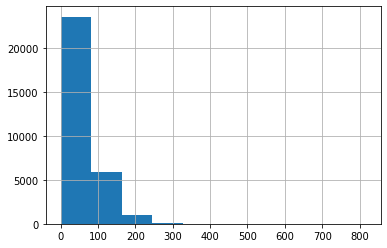

In [ ]:
train["target"].hist()

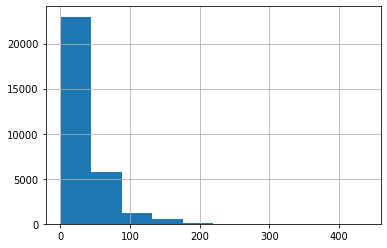

In [ ]:
train["target_min"].hist()

In [ ]:
train["target_min_bin"] = pd.qcut(train["target_min"], 5)

In [ ]:
train.groupby("target_min_bin")["target"].agg(["count", "mean"])

,count,mean
target_min_bin,,
"(0.999, 5.0]",9356,29.646590
"(5.0, 9.0]",3034,37.982070
"(9.0, 23.0]",6005,47.301032
"(23.0, 53.0]",6218,71.474429
"(53.0, 438.0]",5944,125.743439


In [ ]:
train["target_max_bin"] = pd.qcut(train["target_max"], 5)

In [ ]:
train.groupby("target_max_bin")["target"].agg(["count", "mean"])

,count,mean
target_max_bin,,
"(0.999, 55.0]",6292,20.393261
"(55.0, 76.0]",5992,35.875067
"(76.0, 113.0]",6086,51.020177
"(113.0, 162.0]",6277,76.473108
"(162.0, 999.0]",5910,124.313452


In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 4.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pd.options.display.max_rows = 100

In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_matrix = train.phik_matrix()

interval columns not set, guessing: ['target', 'target_min', 'target_max', 'target_variance', 'target_count', 'precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground', 'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction', 'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle', 'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle', 'L3_NO2_solar_zenith_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_NO2_tropopause_pressure', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature', 'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle', 'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle', 'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density', 'L3_CO_H2O_

/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable Place_ID X Date is large: 30557. Are you sure this is not an interval variable? Analysis for pairs of variables including Place_ID X Date can be slow.
  col, df[col].nunique()
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
phik_matrix["target"].sort_values(ascending = False)

Place_ID X Date                                        1.000000
target                                                 1.000000
target_min                                             0.836124
L3_CO_CO_column_number_density                         0.712096
Place_ID                                               0.705806
target_max                                             0.611704
target_max_bin                                         0.538242
target_min_bin                                         0.526623
L3_NO2_absorbing_aerosol_index                         0.442976
L3_SO2_absorbing_aerosol_index                         0.420288
target_variance                                        0.393511
L3_AER_AI_absorbing_aerosol_index                      0.356152
L3_NO2_NO2_slant_column_number_density                 0.301061
L3_AER_AI_sensor_altitude                              0.234160
L3_HCHO_tropospheric_HCHO_column_number_density        0.228989
L3_NO2_NO2_column_number_density        

In [ ]:
train["L3_CO_CO_column_number_density_bin"] = pd.qcut(train["L3_CO_CO_column_number_density"], 5
                                                    )

In [ ]:
train.groupby("L3_CO_CO_column_number_density_bin")["target", "target_min"].agg(["count", "mean"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


target            target_min           
                                    count       mean      count       mean
L3_CO_CO_column_number_density_bin                                        
(-0.001, 0.0296]                     5027  46.980565       5027  21.640839
(0.0296, 0.0341]                     5027  51.454804       5027  23.852377
(0.0341, 0.037]                      5026  52.592977       5026  25.674632
(0.037, 0.0414]                      5027  61.720549       5027  29.396181
(0.0414, 0.292]                      5027  98.184603       5027  48.994231

In [ ]:
train["L3_NO2_absorbing_aerosol_index_bin"] = pd.qcut(train["L3_NO2_absorbing_aerosol_index"], 5)

In [ ]:
train.groupby("L3_NO2_absorbing_aerosol_index_bin")["target", "target_min"].agg(["count", "mean"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


target            target_min           
                                    count       mean      count       mean
L3_NO2_absorbing_aerosol_index_bin                                        
(-3.943, -1.596]                     5674  58.821413       5674  27.712989
(-1.596, -1.303]                     5673  62.165979       5673  30.091909
(-1.303, -1.016]                     5674  61.827177       5674  29.404776
(-1.016, -0.618]                     5673  62.553869       5673  29.601798
(-0.618, 4.825]                      5674  63.103666       5674  30.783891

In [ ]:
train["L3_AER_AI_absorbing_aerosol_index"].isna().mean()

0.006446967961514546

In [ ]:
train["L3_AER_AI_absorbing_aerosol_index_bin"] = pd.qcut(train["L3_AER_AI_absorbing_aerosol_index"], 5)

In [ ]:
train.groupby("L3_AER_AI_absorbing_aerosol_index_bin")["target", "target_min"].agg(["count", "mean"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


target            target_min           
                                       count       mean      count       mean
L3_AER_AI_absorbing_aerosol_index_bin                                        
(-3.968, -1.598]                        6072  58.081406       6072  27.418165
(-1.598, -1.312]                        6072  60.889427       6072  29.334536
(-1.312, -1.041]                        6072  60.267128       6072  28.259173
(-1.041, -0.736]                        6072  59.639361       6072  27.576746
(-0.736, 4.825]                         6072  67.088653       6072  32.814625

In [ ]:
train["L3_SO2_sensor_zenith_angle"].isna().mean()

0.23683607684000393

In [ ]:
train["L3_SO2_sensor_zenith_angle_bin"] = pd.qcut(train["L3_SO2_sensor_zenith_angle"], 5)

In [ ]:
train.groupby("L3_SO2_sensor_zenith_angle_bin")["target", "target_min"].agg(["count", "mean"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


target            target_min           
                                count       mean      count       mean
L3_SO2_sensor_zenith_angle_bin                                        
(-0.001, 15.703]                 4664  63.257054       4664  30.773992
(15.703, 31.174]                 4664  64.155982       4664  30.809949
(31.174, 44.248]                 4664  63.594833       4664  31.054760
(44.248, 54.799]                 4664  60.759112       4664  28.825665
(54.799, 66.111]                 4664  66.345476       4664  32.073156

**Why L3_CH4_CH4_column_volume_mixing_ratio_dry_air have a 81 % of nan values**

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].isna().mean()

0.8104525967863337

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air_isna"] = train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].isna() * 1

In [ ]:
train["L3_CH4_solar_azimuth_angle_isna"] = train["L3_CH4_solar_azimuth_angle"].isna() * 1

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
phik_matrix = train.phik_matrix()

In [ ]:
phik_matrix["target"].sort_values(ascending = False)

In [ ]:
train["target_bin"] = pd.qcut(train["target"], 5)

In [ ]:
train.groupby("target_bin")["L3_CH4_CH4_column_volume_mixing_ratio_dry_air_isna"].agg(["count", "mean"])

In [ ]:
# pd.options.display.max_rows = 3000

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].agg(["min", "max"])

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].describe()

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].median()

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air_isna"].hist()

**Fill nan values by mean**

All nan's fill mean

In [ ]:
train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air_fillna"] = train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].fillna(train["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"].mean())

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
phik_matrix = train.phik_matrix()

In [ ]:
phik_matrix["target"].sort_values(ascending = False)

L3_NO2_tropospheric_NO2_column_number_density          0.283699

L3_HCHO_tropospheric_HCHO_column_number_density_amf    0.242989

L3_HCHO_tropospheric_HCHO_column_number_density        0.242989

L3_HCHO_solar_zenith_angle                             0.242989

L3_HCHO_solar_azimuth_angle                            0.242989

L3_HCHO_sensor_zenith_angle                            0.242989

L3_HCHO_sensor_azimuth_angle                           0.242989

L3_HCHO_cloud_fraction                                 0.242989

L3_HCHO_HCHO_slant_column_number_density               0.242989

L3_SO2_absorbing_aerosol_index                         0.239160

L3_SO2_SO2_slant_column_number_density                 0.236836

L3_SO2_solar_zenith_angle                              0.236836

L3_SO2_SO2_column_number_density_amf                   0.236836

L3_SO2_cloud_fraction                                  0.236836

L3_SO2_sensor_azimuth_angle                            0.236836

L3_SO2_solar_azimuth_angle                             0.236836

L3_SO2_sensor_zenith_angle                             0.236836

L3_SO2_SO2_column_number_density                       0.236836

In [ ]:
train["L3_NO2_NO2_slant_column_number_density"].isna().mean()

In [ ]:
train["L3_NO2_tropospheric_NO2_column_number_density"].value_counts(dropna=False)

In [ ]:
train["L3_NO2_tropospheric_NO2_column_number_density"].describe()

In [ ]:
train["L3_SO2_cloud_fraction"].value_counts(dropna=False)

In [ ]:
train["L3_SO2_cloud_fraction"].describe()

In [ ]:
train["Place_ID"].value_counts()

Feature engeniring

In [ ]:
train["target_variance"].hist()

In [ ]:
train["target_min"].hist()

In [ ]:
train["target_max"].hist()

In [ ]:
train["target_variance"].describe()

In [ ]:
train["target_min"].describe()

In [ ]:
train["target_max"].describe()

In [ ]:
train["target"].hist()

In [ ]:
train["target"].describe()

In [ ]:
train = pd.read_csv("/content/Train.csv")

In [ ]:
train["target_div"] = train["target_max"] - train["target_min"]

In [ ]:
train["target_count"].hist()

In [ ]:
train

In [ ]:
pd.options.display.max_rows = 100

In [ ]:
phik_matrix = train.phik_matrix()

In [ ]:
phik_matrix["target_min"].sort_values(ascending = False)

## **Preprocesing**

In [ ]:
train = train.drop(["Place_ID X Date", "Date"], axis=1)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
simean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
for i in train.columns:
  if "L3" in i:
    train[i] = simean.fit_transform(np.array(train[i]).reshape(-1,1))

In [ ]:
train.isna().any()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

train["Place_ID"] = label.fit_transform(train["Place_ID"])

In [ ]:
train

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
for i in train.columns:
    train[i] = scaler.fit_transform(np.array(train[i]).reshape(-1,1))

In [ ]:
train

## **Train**

In [ ]:
test_size = 0.528045029
random_state = 42

In [ ]:
X = train.drop(["target"], axis=1)

y = train["target"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [ ]:
model = BayesianRidge()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

r2 = r2_score(y_test, y_predicted)

mse = mean_squared_error(y_test, y_predicted, squared=False)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

In [ ]:
y_predicted

# **Sudmission**

In [ ]:
sudmission = pd.DataFrame({"Place_ID X Date" : test["Place_ID X Date"],
                           "target": y_predicted})

In [ ]:
sudmission

In [ ]:
sudmission.to_csv('first_submission.csv', index = False)